## Group members:
### Shir Gonen
### Koral Yehezkia
### Eden Cohen
### Noa Bar Nov

# EDA Project - Laptop sales

<div>
<img src="images/dataset-cover.png" width="400"/>
</div>


1. [Wrangling data](#section1)

   1.1 [Fix columns](#section1.1)   
   1.2 [Missing values](#section1.2)  
   1.3 [Outliers](#section1.3)    
   1.4 [Transformations](section1.4)
  
2. [Understand the data](#section2)
3. [Correlations](#section3)
4. [Categorical data](#section4)

We'll work with a marketing of Laptops dataset, taken from [Flipkaet](flipkart.com)

Based on the example [here](https://www.kaggle.com/jennifercrockett/marketing-analytics-eda-task-final)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
url = 'https://raw.githubusercontent.com/NoaBarNov/Data-Science/main/Cleaned_Laptop_data.csv'
data_comp = pd.read_csv(url)

In [4]:
data = data_comp.copy()

In [5]:
data.shape

(896, 23)

In [6]:
data.head()

,brand,model,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,...,display_size,warranty,Touchscreen,msoffice,latest_price,old_price,discount,star_rating,ratings,reviews
0,ASUS,Celeron,Intel,Celeron Dual,Missing,4,DDR4,0,1024,Windows,...,15.6,1,No,No,23990,26990,11,3.8,15279,1947
1,ASUS,VivoBook,Intel,Core i3,10th,8,DDR4,512,0,Windows,...,15.6,1,No,No,37990,50990,25,4.3,990,108
2,ASUS,Vivobook,Intel,Core i3,10th,8,DDR4,0,1024,Windows,...,14.1,1,No,No,32890,46990,30,3.9,28,4
3,HP,Core,Intel,Core i3,11th,8,DDR4,512,0,Windows,...,15.6,1,No,Yes,42990,57330,25,4.4,158,18
4,HP,Core,Intel,Core i5,11th,8,DDR4,512,0,Windows,...,15.6,0,No,No,54990,70171,21,4.2,116,15


# Wrangling data

#### 1.1 Fix columns

In [7]:
data.dtypes

brand               object
model               object
processor_brand     object
processor_name      object
processor_gnrtn     object
ram_gb              object
ram_type            object
ssd                  int64
hdd                  int64
os                  object
os_bit               int64
graphic_card_gb      int64
weight              object
display_size        object
warranty             int64
Touchscreen         object
msoffice            object
latest_price         int64
old_price            int64
discount             int64
star_rating        float64
ratings              int64
reviews              int64
dtype: object

#### 1.2 Missing values & understanding the data

In [8]:
data.isnull().sum().sort_values(ascending=False)

ram_gb             25
ram_type           25
processor_name      1
brand               0
display_size        0
ratings             0
star_rating         0
discount            0
old_price           0
latest_price        0
msoffice            0
Touchscreen         0
warranty            0
graphic_card_gb     0
weight              0
model               0
os_bit              0
os                  0
hdd                 0
ssd                 0
processor_gnrtn     0
processor_brand     0
reviews             0
dtype: int64

Replacing missing to NaN's for conveniency

In [9]:
data = data.replace('Missing' , np.nan)

In [10]:
data.isnull().sum().sort_values(ascending=False)

processor_gnrtn    314
os                  72
ram_gb              25
ram_type            25
processor_name       1
brand                0
warranty             0
ratings              0
star_rating          0
discount             0
old_price            0
latest_price         0
msoffice             0
Touchscreen          0
graphic_card_gb      0
display_size         0
weight               0
model                0
os_bit               0
hdd                  0
ssd                  0
processor_brand      0
reviews              0
dtype: int64

לבדוק ש25 בשתי ההעמודות הם לא אותן השורות

In [11]:
data[(data['ram_gb'].values == np.nan) & (data['ram_type'].values == np.nan)]

,brand,model,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,...,display_size,warranty,Touchscreen,msoffice,latest_price,old_price,discount,star_rating,ratings,reviews


##### Fixing processor generator column

In [12]:
data['processor_gnrtn'].isnull().sum()

314

<AxesSubplot:xlabel='processor_gnrtn', ylabel='Percent'>

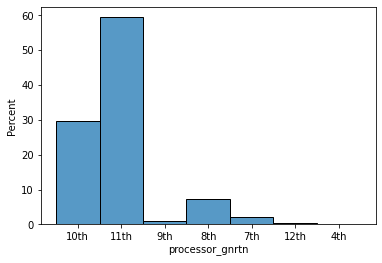

In [13]:
sns.histplot(data = data, x= 'processor_gnrtn', stat = 'percent')

We have dicided to ignore the missing values because there are 33.33% missing valuse

In [14]:
data['processor_gnrtn'].isnull().sum()

314

##### Fixing operation system column

In [15]:
data['os'].isnull().sum()

72

In [16]:
data.os.unique()

array(['Windows', 'Mac', nan], dtype=object)

Text(0.5, 0, 'operation system')

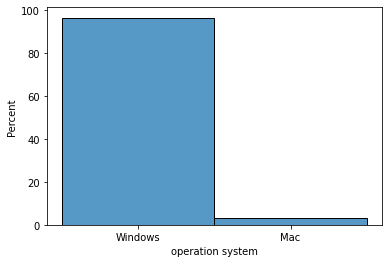

In [17]:
sns.histplot(data = data, x= 'os', stat = 'percent')
plt.xlabel("operation system")

we can see that most of the computers contains Windows opration system so we will replace the missing values with windows values (לא ישנה את הסטטיסטיקה)

In [18]:
data['os'] = data['os'].fillna('Windows')

In [19]:
data.os.unique()

array(['Windows', 'Mac'], dtype=object)

In [20]:
data['os'].isnull().sum()

0

##### Fixing ram_gb column

In [21]:
data['ram_gb'].isnull().sum()

25

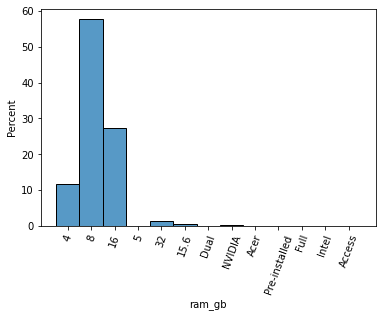

In [22]:
sns.histplot(data = data, x= 'ram_gb', stat = 'percent')
plt.xticks(rotation = 70)
plt.show()

only 2% of the data is NaN so we will convert the missing data to the most common gb - 8

In [23]:
data['ram_gb'] = data['ram_gb'].fillna('8')

In [24]:
data['ram_gb'].unique()

array(['4', '8', '16', '5', '32', '15.6', 'Dual', 'NVIDIA', 'Acer',
       'Pre-installed', 'Full', 'Intel', 'Access'], dtype=object)

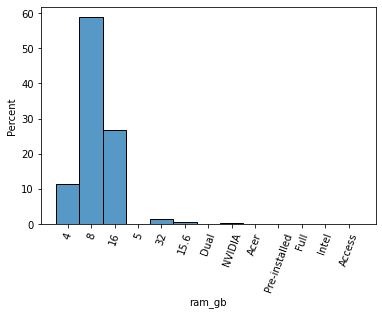

In [25]:
sns.histplot(data = data, x= 'ram_gb', stat = 'percent')
plt.xticks(rotation = 70)
plt.show()

In [26]:
data['ram_gb'] =data['ram_gb'].replace({'4':4,'8':8,'16':16,'32':32,'5':5})
data.ram_gb.unique()

array([4, 8, 16, 5, 32, '15.6', 'Dual', 'NVIDIA', 'Acer', 'Pre-installed',
       'Full', 'Intel', 'Access'], dtype=object)

we can see that there are some wrong data that got in the column so we will drop out the wrong rows
15.6 is screen size
also, Dual, NVIDIA, Acer, intel is companies

we will find the rows that we aren't sure about them
5, Pre-installed, Full, Access

In [27]:
data[(data['ram_gb'].values == 'Pre-installed') | (data['ram_gb'].values == 'Full') | (data['ram_gb'].values == 'Access') | (data['ram_gb'].values == '5')]

,brand,model,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,...,display_size,warranty,Touchscreen,msoffice,latest_price,old_price,discount,star_rating,ratings,reviews
710,MSI,GS,512,GB SSD,NaN,Pre-installed,Windows,0,0,Windows,...,8th,0,No,No,149990,169990,11,4.1,10,3
769,Lenovo,Legion,Pre-installed,Genuine Windows,NaN,Full,LED,0,0,Windows,...,0,0,No,No,77890,110890,29,4.4,208,57
846,HP,Chromebook,64,GB eMMC,NaN,Access,Apps,0,0,Windows,...,0,0,No,No,61745,0,0,4.6,23,4


we will drop the folowing rows because we can see false information also in cloumn processor_brand.
בשורות שיש להם ערכים מספריים בעמודה של המותג. 

In [28]:
dorp_preinstalled_index = data.loc[data.ram_gb == 'Pre-installed'].index
dorp_access_index = data.loc[data.ram_gb == 'Access'].index
dorp_156_index = data.loc[data.ram_gb == '15.6'].index
dorp_5_index = data.loc[data.ram_gb == '5'].index
dorp_dual_index = data.loc[data.ram_gb == 'Dual'].index
dorp_nvidia_index = data.loc[data.ram_gb == 'NVIDIA'].index
dorp_acer_index = data.loc[data.ram_gb == 'Acer'].index
dorp_intel_index = data.loc[data.ram_gb == 'Intel'].index
data.drop(dorp_preinstalled_index,inplace = True)
data.drop(dorp_access_index,inplace = True)
data.drop(dorp_156_index,inplace = True)
data.drop(dorp_dual_index,inplace = True)
data.drop(dorp_nvidia_index,inplace = True)
data.drop(dorp_acer_index,inplace = True)
data.drop(dorp_intel_index,inplace = True)
data.drop(dorp_5_index,inplace = True)

In [29]:
data.shape

(883, 23)

In [30]:
data['ram_gb'] = data['ram_gb'].replace({'Full':'32'})

we will convert the column 'ram gb' to numeric data, the calue that interupsמפריע is 'full', we searched on the interent and we realize that the maximum size of gb laptop is 32 gb ram

<div>
<img src="images/size32gb.png" width="400"/>
</div>


Based on the the website [here](https://laptoping.com/laptop-pc-ram-size-and-performance-explained.html)

<AxesSubplot:xlabel='ram_gb', ylabel='Percent'>

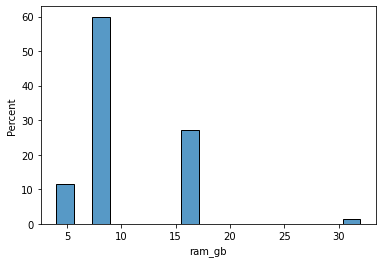

In [92]:
sns.histplot(data = data, x= 'ram_gb', stat = 'percent')

##### Fixing ram_type column

In [31]:
data['ram_type'].isnull().sum()

25

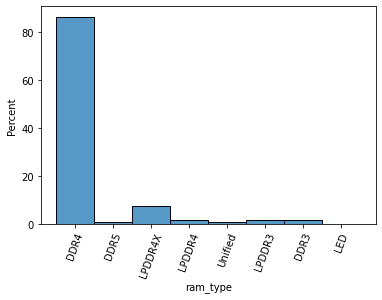

In [32]:
sns.histplot(data = data, x= 'ram_type', stat = 'percent')
plt.xticks(rotation = 70)
plt.show()

only 0.02% of the data is NaN so we will convert the missing data to the most common DDR4

In [33]:
data['ram_type'] = data['ram_type'].fillna('DDR4')

In [34]:
data['ram_type'].isnull().sum()

0

##### Fixing processor_name column

In [35]:
data['processor_name'].isnull().sum()

1

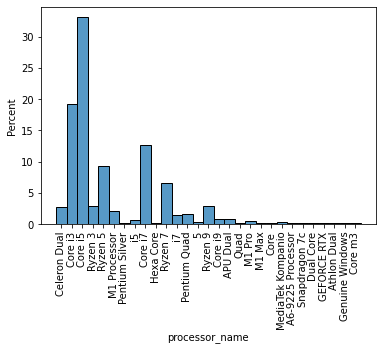

In [36]:
sns.histplot(data = data, x= 'processor_name', stat = 'percent')
plt.xticks(rotation = 90)
plt.show()

we dicided to drop it out because we cant conclude where it might belong

In [37]:
data = data.dropna(subset = ['processor_name'])

In [38]:
data['processor_name'].isnull().sum()

0

fixing display size coloumn

In [39]:
data['display_size'].unique()

array(['15.6', '14.1', '14', '13.3', '0', '17.3', '14.96', '15', '14.2',
       '16.2', '14.9', '13.4', '13', '15.3', '16', '16.1', '13.5', 'All',
       '12.2', '12', 'ITW)'], dtype=object)


https://www.flipkart.com/automotive-accessories/vehicle-stereo-and-music-system/car-video-monitors/itw~brand/pr?sid=1mt%2Ceoe%2Coa4 
- להוריד ערכים מהעמודה של display size 
זו ההוכחה לכך שitw
זה מסך לרכב והוא לא רלוונטי לדאטה


נזרוק את האובגקטים ונשאיר את האינטים (להוסיך פה את ההערה על המחשב של הרכב)

In [40]:
drop_display_itw = data[data['display_size'] == 'ITW)'].index
drop_display_all = data.loc[data.display_size == 'All'].index
data.drop(data[data['display_size'] == 'ITW)'].index,inplace = True)
data.drop(data[data['display_size'] == 'All'].index,inplace = True)

In [41]:
data.display_size.unique()

array(['15.6', '14.1', '14', '13.3', '0', '17.3', '14.96', '15', '14.2',
       '16.2', '14.9', '13.4', '13', '15.3', '16', '16.1', '13.5', '12.2',
       '12'], dtype=object)

#### 1.3 Transformations

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 880 entries, 0 to 895
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   brand            880 non-null    object 
 1   model            880 non-null    object 
 2   processor_brand  880 non-null    object 
 3   processor_name   880 non-null    object 
 4   processor_gnrtn  582 non-null    object 
 5   ram_gb           880 non-null    object 
 6   ram_type         880 non-null    object 
 7   ssd              880 non-null    int64  
 8   hdd              880 non-null    int64  
 9   os               880 non-null    object 
 10  os_bit           880 non-null    int64  
 11  graphic_card_gb  880 non-null    int64  
 12  weight           880 non-null    object 
 13  display_size     880 non-null    object 
 14  warranty         880 non-null    int64  
 15  Touchscreen      880 non-null    object 
 16  msoffice         880 non-null    object 
 17  latest_price    

In [43]:
data['ram_gb'] = data['ram_gb'].astype(int)

In [44]:
data.ram_gb.info()

<class 'pandas.core.series.Series'>
Int64Index: 880 entries, 0 to 895
Series name: ram_gb
Non-Null Count  Dtype
--------------  -----
880 non-null    int32
dtypes: int32(1)
memory usage: 10.3 KB


display size - changing to float column

In [45]:
data['display_size'] = data['display_size'].astype(float)

In [46]:
data.display_size.info()

<class 'pandas.core.series.Series'>
Int64Index: 880 entries, 0 to 895
Series name: display_size
Non-Null Count  Dtype  
--------------  -----  
880 non-null    float64
dtypes: float64(1)
memory usage: 13.8 KB


now we can work with the numeric data

#### 1.4 Noisy data - outliers

We choose only the numeric data because we want to see it in boxplot

Select only numeric columns:

In [47]:
data.dtypes

brand               object
model               object
processor_brand     object
processor_name      object
processor_gnrtn     object
ram_gb               int32
ram_type            object
ssd                  int64
hdd                  int64
os                  object
os_bit               int64
graphic_card_gb      int64
weight              object
display_size       float64
warranty             int64
Touchscreen         object
msoffice            object
latest_price         int64
old_price            int64
discount             int64
star_rating        float64
ratings              int64
reviews              int64
dtype: object

In [80]:
features_for_brand = ['brand','ram_gb','ssd','hdd','os_bit','graphic_card_gb','display_size','warranty','latest_price','old_price','discount','star_rating','ratings','reviews']

creating 2 melted data frames
1. by brand
2. by model

In [79]:
melted_by_brand = pd.melt(data[features_for_brand], id_vars = 'brand', value_vars = features_for_brand)
melted_by_brand

,brand,variable,value
0,ASUS,ram_gb,4.0
1,ASUS,ram_gb,8.0
2,ASUS,ram_gb,8.0
3,HP,ram_gb,8.0
4,HP,ram_gb,8.0
...,...,...,...
11422,DELL,reviews,5.0
11423,DELL,reviews,15.0
11424,HP,reviews,16.0
11425,ASUS,reviews,6.0


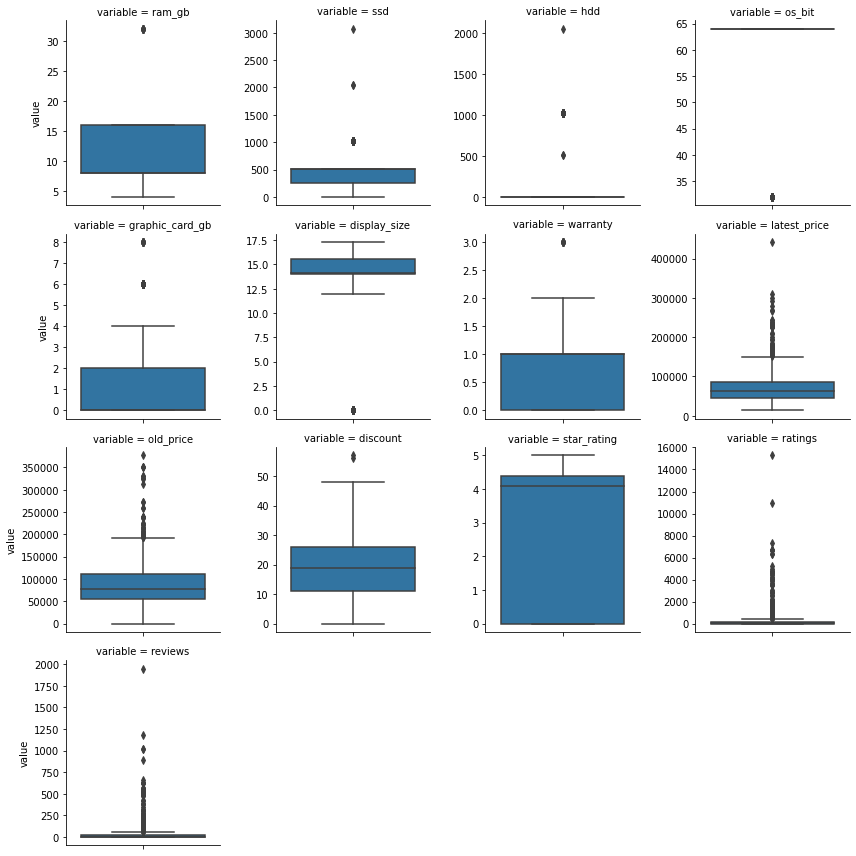

In [50]:
g = sns.FacetGrid(data =melted_by_brand, col='variable',  col_wrap=4,sharey = False)
g.map_dataframe(sns.boxplot, y = 'value')
plt.show()

לראות אולי כדאי להרחיב את ציר y 
log scale
<div>
<img src="images/red.png" width="100"/>
</div>

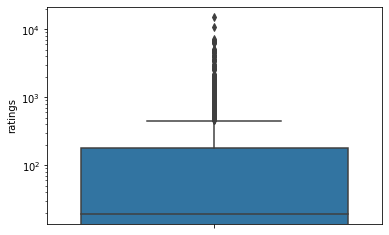

In [96]:
ax = sns.boxplot(data =data , y = 'ratings')
ax.set_yscale('log')
plt.show()

In [51]:
features_for_model = ['model','ram_gb','ssd','hdd','os_bit','graphic_card_gb','display_size','warranty','latest_price','old_price','discount','star_rating','ratings','reviews']

In [52]:
melted_by_model = pd.melt(data[features_for_model], id_vars = 'model', value_vars = features_for_model)
melted_by_model

,model,variable,value
0,Celeron,ram_gb,4.0
1,VivoBook,ram_gb,8.0
2,Vivobook,ram_gb,8.0
3,Core,ram_gb,8.0
4,Core,ram_gb,8.0
...,...,...,...
11435,Core,reviews,5.0
11436,Core,reviews,15.0
11437,Pavilion,reviews,16.0
11438,Vivobook,reviews,6.0


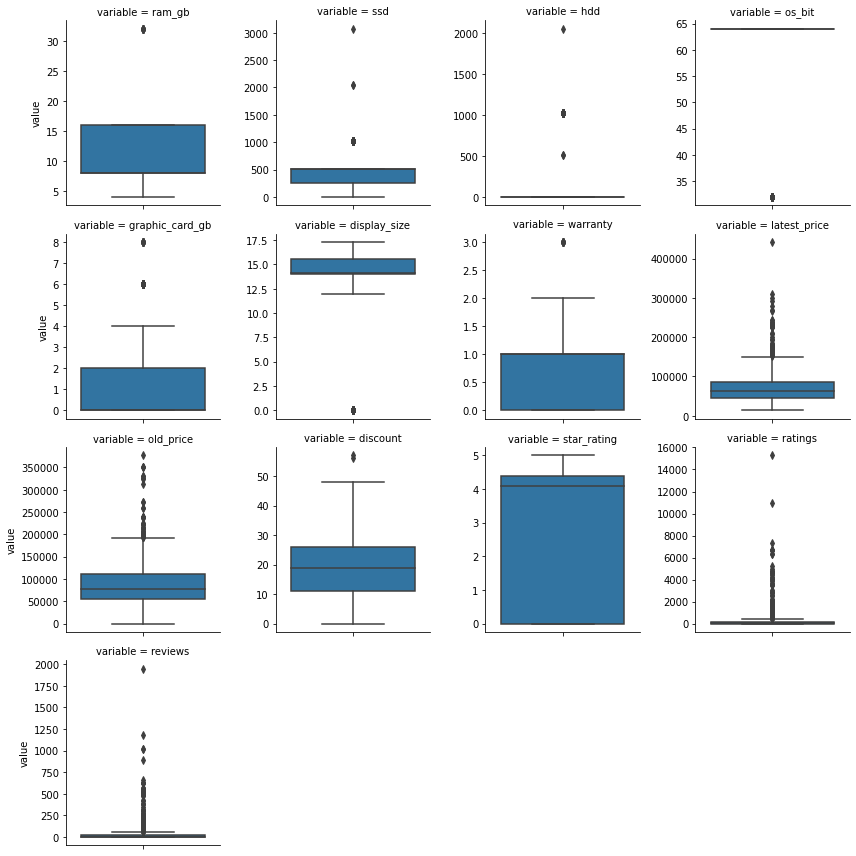

In [53]:
g = sns.FacetGrid(data =melted_by_model, col='variable',  col_wrap=4,sharey = False)
g.map_dataframe(sns.boxplot, y = 'value')
plt.show()

#### 2 Understanding the data

<AxesSubplot:xlabel='ram_gb', ylabel='Percent'>

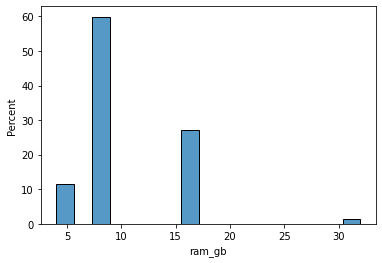

In [54]:
sns.histplot(data = data, x= 'ram_gb', stat = 'percent')

#### 3 Correlations

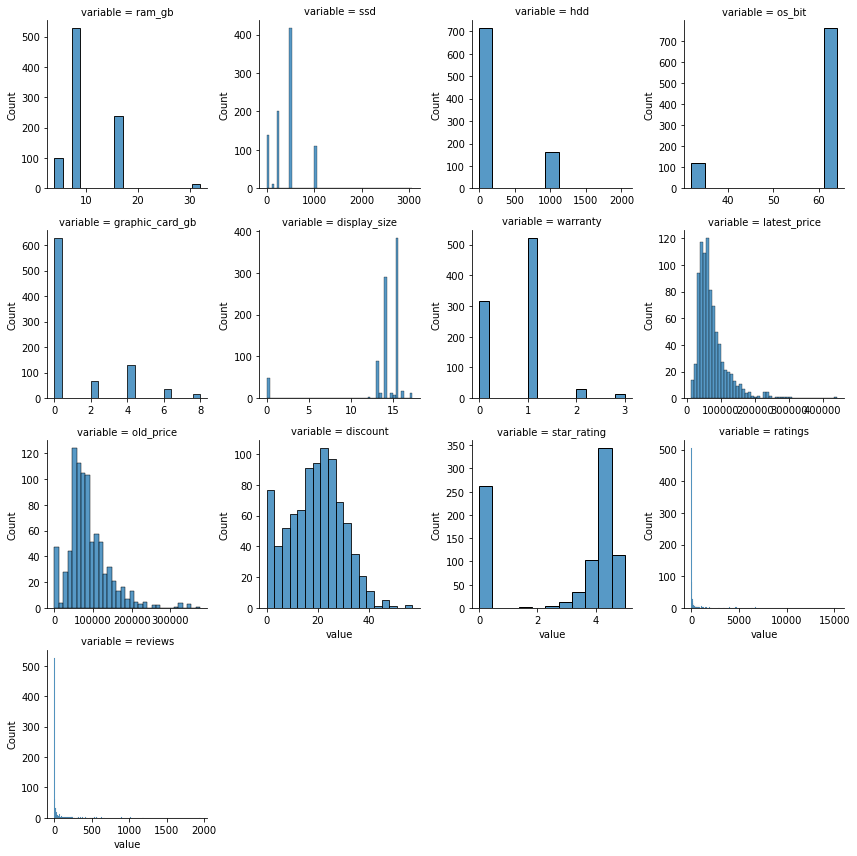

In [55]:
g = sns.FacetGrid(data =melted_by_brand , col="variable", col_wrap=4, sharex=False, sharey=False)
g.map_dataframe(sns.histplot, x = "value")
plt.show()

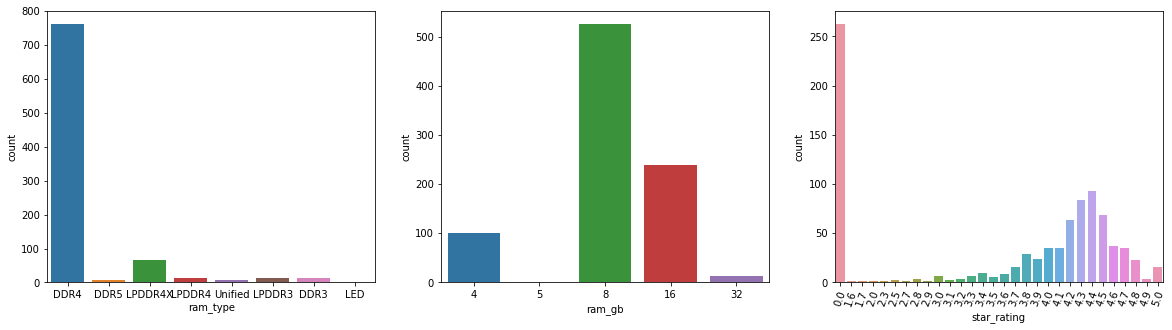

In [56]:
fig, axes = plt.subplots(figsize=(20, 5), ncols=3)
sns.countplot(ax=axes[0], x="ram_type", data=data)
sns.countplot(ax=axes[1], x="ram_gb", data=data)
sns.countplot(ax=axes[2], x="star_rating", data=data)
plt.xticks(rotation = 70)
plt.show()

In [58]:
data['Touchscreen'] = data['Touchscreen'].replace({'Yes':1,'No':0})

In [59]:
data['msoffice'] = data['msoffice'].replace({'Yes':1,'No':0})

In [60]:
data_groupby_model = data.groupby('model')[['brand','star_rating','ratings','reviews','Touchscreen','display_size','ram_gb','ram_type','discount','latest_price','old_price','msoffice']].sum()
data_groupby_model

,star_rating,ratings,reviews,Touchscreen,display_size,ram_gb,discount,latest_price,old_price,msoffice
model,,,,,,,,,,
14a,3.6,232,23,0,0.0,4,16,26470,31532,0
14s,21.0,8663,930,0,70.0,36,69,245460,289854,4
15,8.6,2126,304,0,46.8,24,48,198921,107998,0
15-ec1105AX,4.5,1049,134,0,15.6,8,15,58990,70172,0
15q,12.4,3726,410,0,46.8,16,6,112662,50190,0
...,...,...,...,...,...,...,...,...,...,...
Zenbook,8.9,86,16,5,96.6,88,158,687930,894930,3
Zephyrus,9.3,8,1,0,77.3,88,68,1027219,514970,0
t.book,10.9,83,19,3,36.6,12,16,148970,157988,0


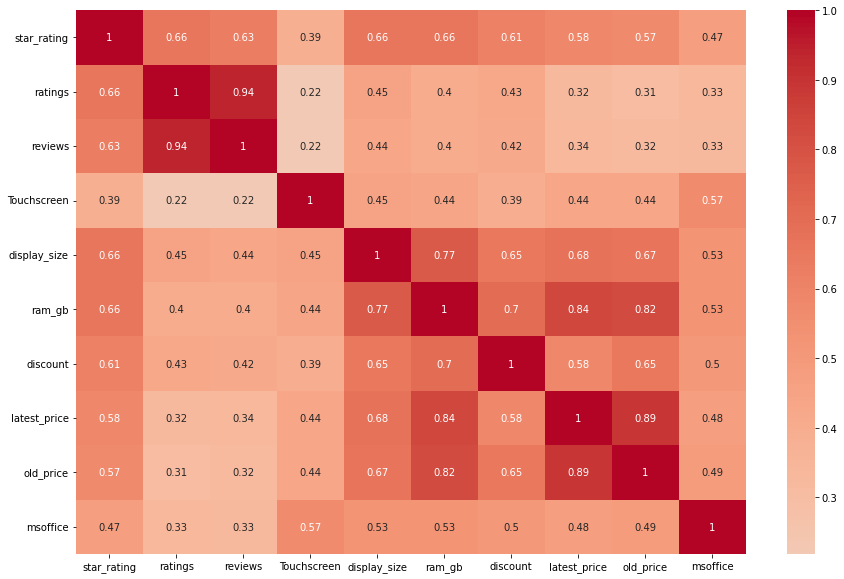

In [78]:
corrs = data_groupby_model.corr(method = 'kendall')
plt.figure(figsize=(15,10))  
sns.heatmap(corrs, cmap='coolwarm', center=0, annot = True);

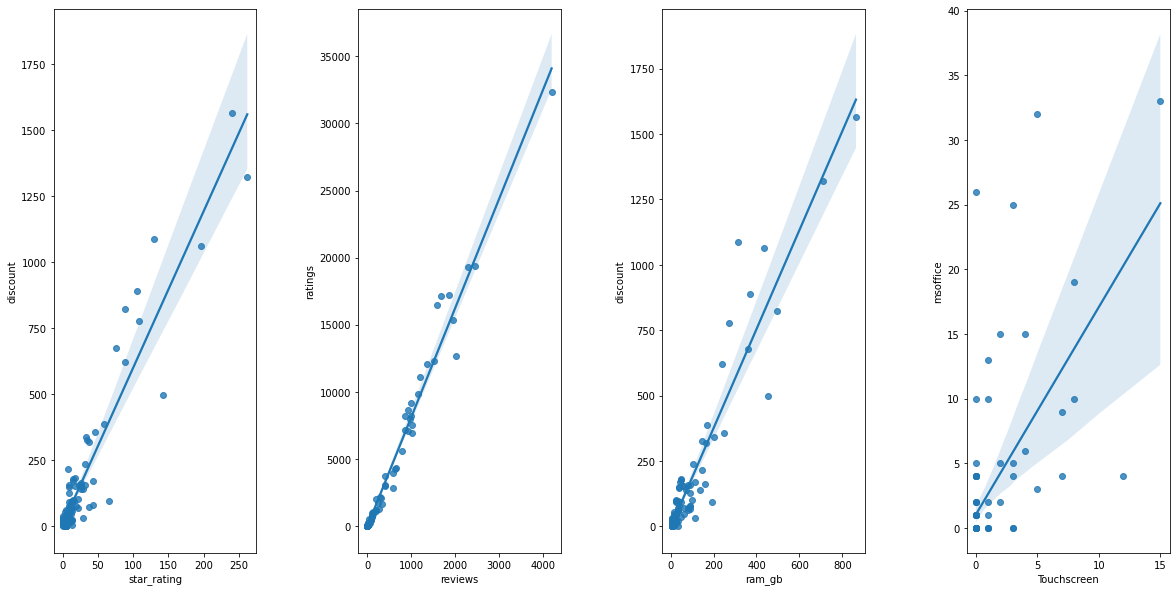

In [62]:
fig, ax = plt.subplots(1,4,figsize=(20, 10))
sns.regplot(x='star_rating', y='discount', data=data_groupby_model, ax=ax[0])
sns.regplot(x='reviews', y='ratings', data=data_groupby_model, ax = ax[1])
sns.regplot(x='ram_gb', y='discount', data=data_groupby_model, ax = ax[2])
sns.regplot(x='Touchscreen', y='msoffice', data=data_groupby_model, ax = ax[3])
plt.subplots_adjust(wspace = 0.5)

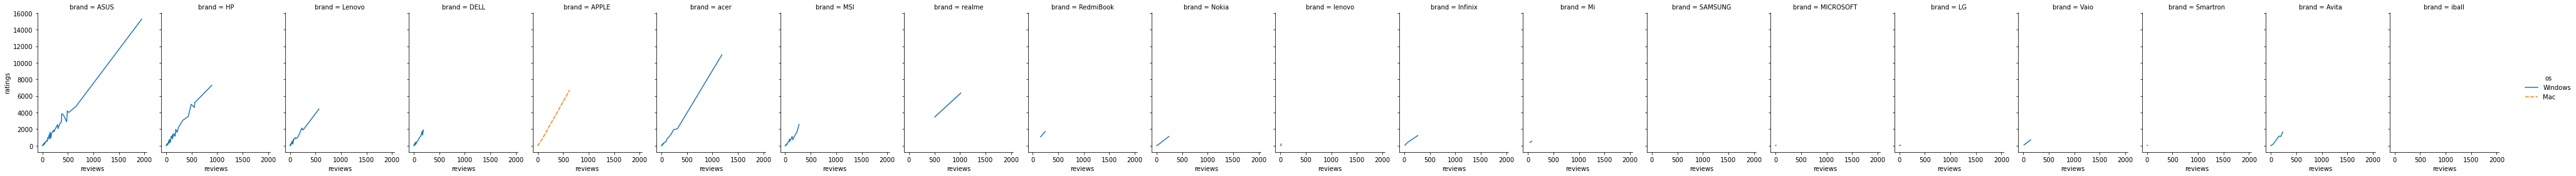

In [63]:
g = sns.relplot(data=data,x="reviews", y="ratings", hue="os", style="os", col="brand", height=4, aspect=.7, kind="line")

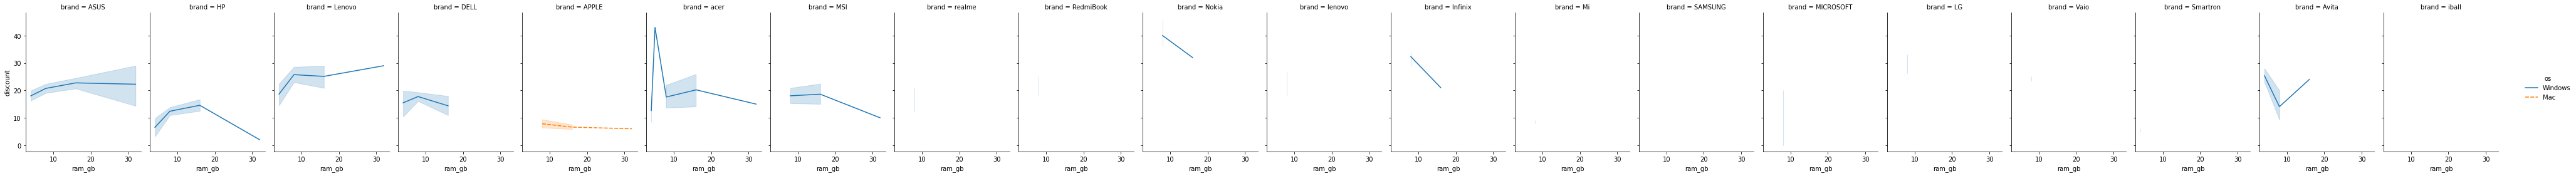

In [64]:
g = sns.relplot(data=data,x="ram_gb", y="discount", hue="os", style="os", col="brand", height=4, aspect=.7, kind="line")

In [65]:
data_groupby_brand = data.groupby('brand')[['model','star_rating','ratings','reviews','Touchscreen','display_size','ram_gb','ram_type','discount','latest_price','old_price','msoffice']].sum()
data_groupby_brand

,star_rating,ratings,reviews,Touchscreen,display_size,ram_gb,discount,latest_price,old_price,msoffice
brand,,,,,,,,,,
APPLE,132.1,33811,3291,0,382.90,368,199,4247820,4582200,0
ASUS,667.8,93345,12046,30,3524.10,2672,5268,19715443,23127693,56
Avita,32.5,6998,1040,0,235.90,140,297,1003664,1180720,0
DELL,432.1,18859,2181,19,2207.86,1372,2581,9297124,10877403,64
HP,447.6,75055,8557,26,1974.40,1448,1750,10075356,10669751,83
Infinix,17.0,2882,609,0,56.00,40,118,163460,229996,0
LG,9.1,83,27,0,73.60,40,148,380950,545000,0
Lenovo,431.4,25437,3024,19,2104.10,1476,3622,10644876,13247430,74
MICROSOFT,12.7,114,16,3,41.50,24,24,292179,229998,0


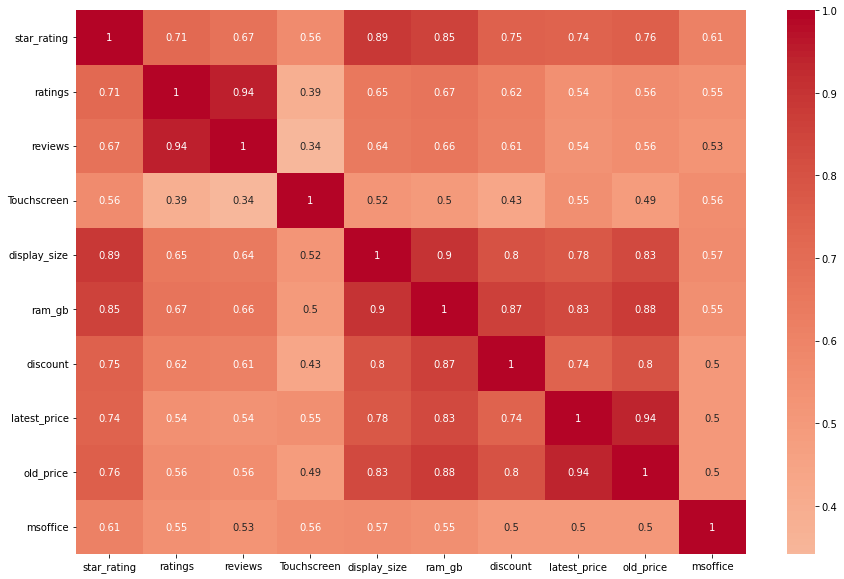

In [66]:
corrs = data_groupby_brand.corr(method = 'kendall')
plt.figure(figsize=(15,10)) 
sns.heatmap(corrs, cmap='coolwarm', center=0, annot = True);

### display size and star ratings (0.89)

<AxesSubplot:xlabel='star_rating', ylabel='display_size'>

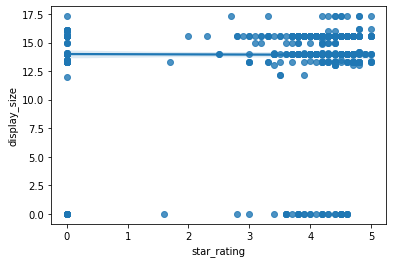

In [117]:
sns.regplot(data = data, x = 'star_rating', y = 'display_size')

## last price - ram gb

<AxesSubplot:xlabel='latest_price', ylabel='ram_gb'>

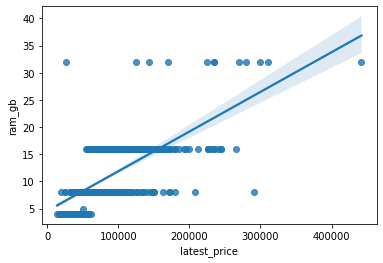

In [118]:
sns.regplot(data = data, x = 'latest_price', y = 'ram_gb')

### star rating - ram gb (0.85)

<AxesSubplot:xlabel='ram_gb', ylabel='star_rating'>

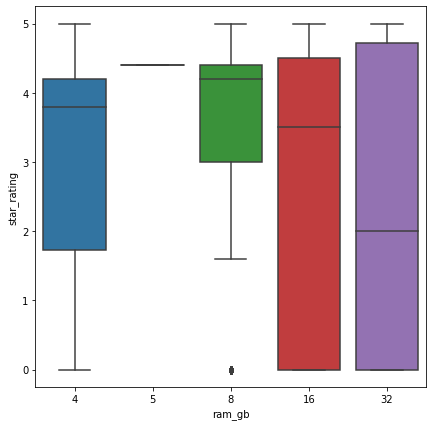

In [116]:
plt.figure(figsize=(7,7))
sns.boxplot(data = data , x = 'ram_gb', y = 'star_rating')

## ratings - ram gb

<AxesSubplot:xlabel='ram_gb', ylabel='ratings'>

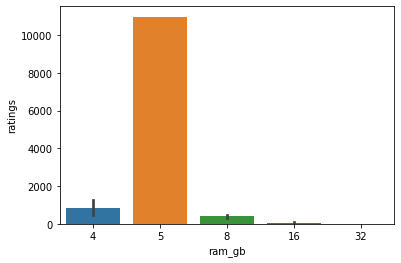

In [121]:
sns.barplot(data = data, x = 'ram_gb', y = 'ratings')

[(0.0, 100.0)]

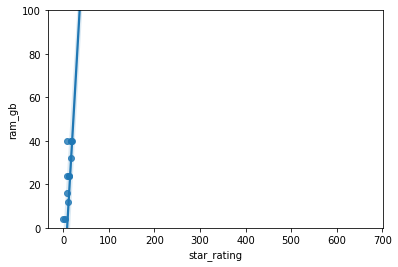

In [111]:
ax = sns.regplot(data = data_groupby_brand, x = 'star_rating', y = 'ram_gb')
ax.set(ylim=(0,100))

<AxesSubplot:xlabel='msoffice', ylabel='brand'>

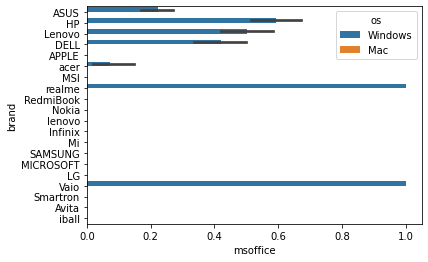

In [132]:
sns.barplot(x = 'msoffice',y = 'brand',hue = 'os',data = data)

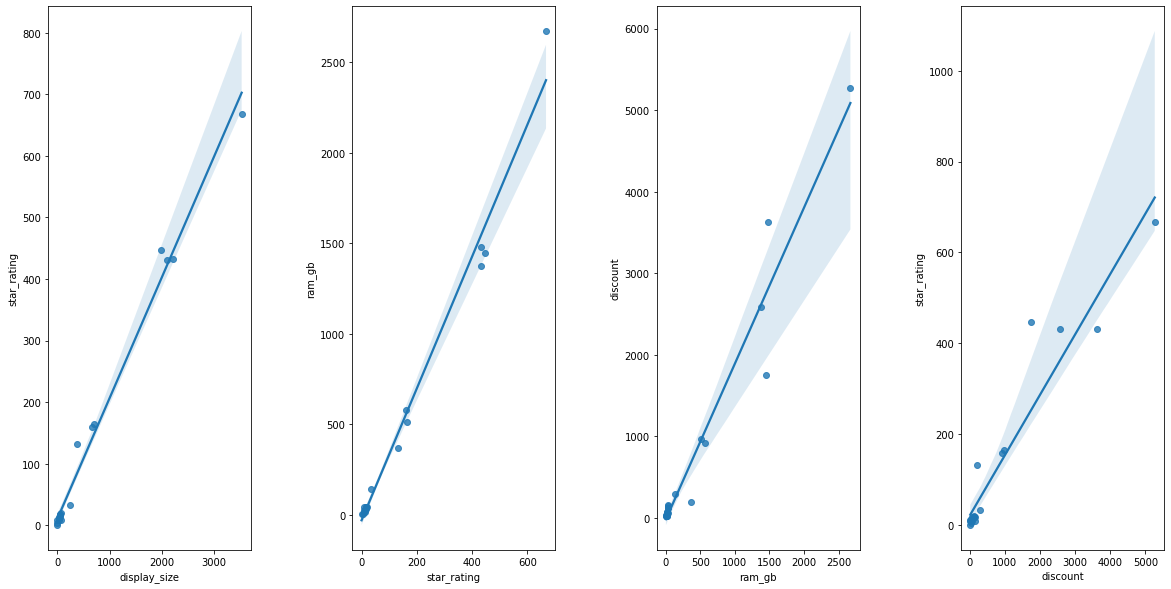

In [124]:
fig, ax = plt.subplots(1,4,figsize=(20, 10))
sns.regplot(x='display_size', y='star_rating', data=data_groupby_brand, ax=ax[0])
sns.regplot(x='star_rating', y='ram_gb', data=data_groupby_brand, ax = ax[1])
sns.regplot(x='ram_gb', y='discount', data=data_groupby_brand, ax = ax[2])
sns.regplot(x='discount', y='star_rating', data=data_groupby_brand, ax = ax[3])
plt.subplots_adjust(wspace = 0.5)

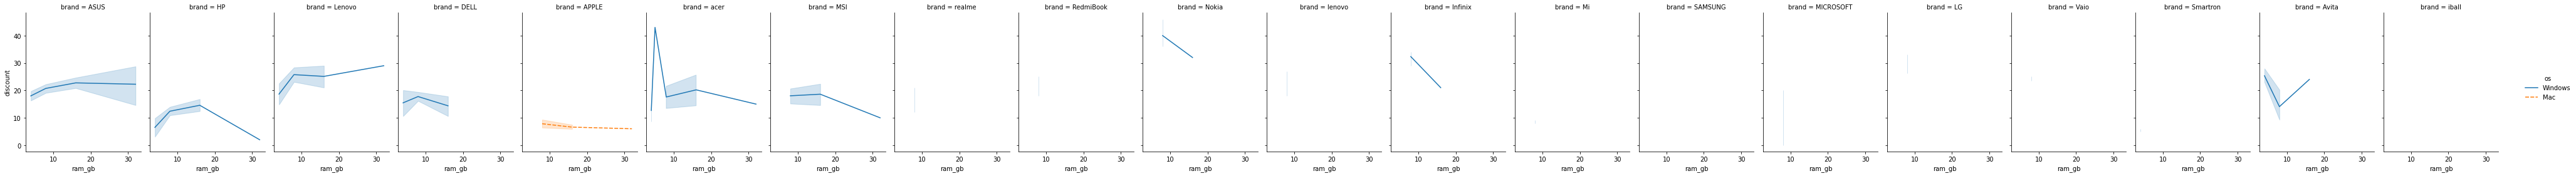

In [68]:
g = sns.relplot(data=data,x="ram_gb", y="discount", hue="os", style="os", col="brand", height=4, aspect=.7, kind="line")

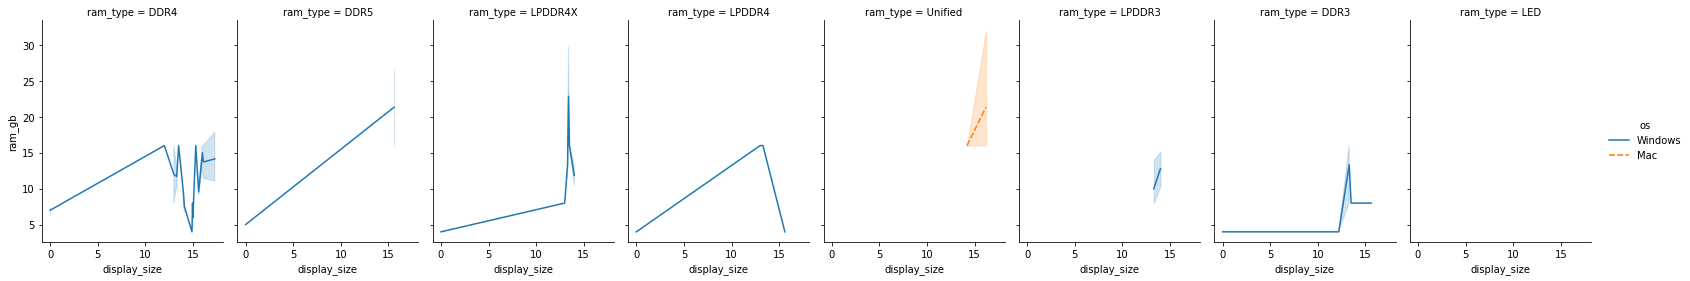

In [69]:
g = sns.relplot(data=data,x="display_size", y="ram_gb", hue="os", style="os", col="ram_type", height=4, aspect=.7, kind="line")

#מסקנה
    ניתן לראות כאן שבגרף השני מימין יש יחס לינארי ישר בין זיכרון לגודל המסך כאשר הראם טייפ הוא השווה המיוצג לכותרת בצערכת הפעלת os

In [71]:
data['processor_brand'].unique()
#************* יש לעדכן את הבנות כי צריך לסדר את המידע כאן אם מופיע שם שעוד לא עודכן.

array(['Intel', 'AMD', 'Apple', 'MediaTek', 'Qualcomm', 'NVIDIA',
       'Pre-installed'], dtype=object)

In [72]:
drop_processor_brand = data[data['processor_brand'] == 'Pre-installed'].index
data.drop(data[data['processor_brand'] == 'Pre-installed'].index,inplace = True)

In [73]:
data['processor_brand'].unique()

array(['Intel', 'AMD', 'Apple', 'MediaTek', 'Qualcomm', 'NVIDIA'],
      dtype=object)

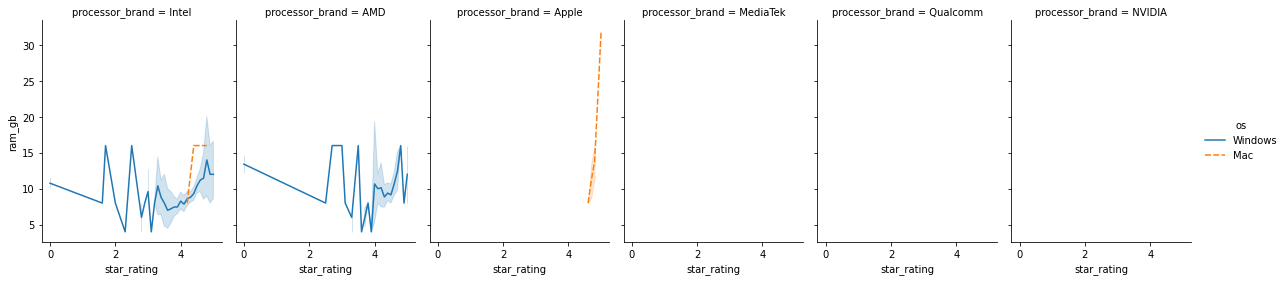

In [74]:
g = sns.relplot(data=data,x="star_rating", y="ram_gb", hue="os", style="os", col="processor_brand", height=4, aspect=.7, kind="line")

##### מסקנה:
#כאשר המעבד שלנו מחברת אפל ניתן לראות כי דירוג הכוכבים גדול מ4(כלומר שביעות הרצון מאוד גבוהה) והיא הולכת ועולה ככל שהראם עולה בצורה אקספוננציאלית כמעט 
#warranty	Touchscreen

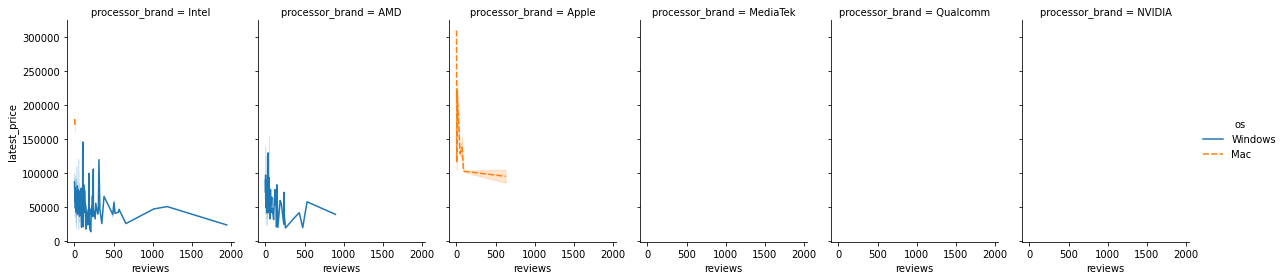

In [75]:
g = sns.relplot(data=data,x="reviews", y="latest_price", hue="os", style="os", col="processor_brand", height=4, aspect=.7, kind="line")

#### מסקנה כללית:
    אז כמות התגבותו לגביהמחשבים הולכת וגדלה.(אולי מחאר שהמחשב יותר נגיש ליותר אנשים ) ניתן לראות שלא משנה המעבד לכל מערכת הפעלה כאשר המחיר נמוך יותר ויותר כמות התגובות למחשב הולכת וגדלה. מאחר שבדאטה הנל אין לנו את האופציה לדעת האם התגובותו חיוביות או שליליות ולכן ניתן להבין כי כאשר המחיר נמוך יותר 

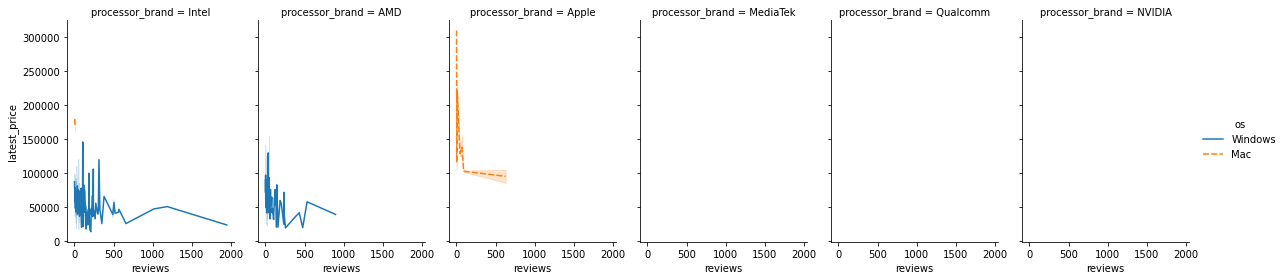

In [76]:
g = sns.relplot(data=data,x="reviews", y="latest_price", hue="os", style="os", col="processor_brand", height=4, aspect=.7, kind="line")